In [1]:
# this a basic machine learning project from kaggle 

In [2]:
# load the module that I am going to use
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
# plot figs on jupyter
%matplotlib inline
rcParams['figure.figsize'] = 8,6

In [9]:
# load loan data
df_loan = pd.read_csv('inputData/loan.csv',low_memory = False)

In [11]:
print(df_loan.head(3))

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   

   int_rate  installment grade sub_grade     ...      total_bal_il il_util  \
0     10.65       162.87     B        B2     ...               NaN     NaN   
1     15.27        59.83     C        C4     ...               NaN     NaN   
2     15.96        84.33     C        C5     ...               NaN     NaN   

  open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         NaN          NaN        NaN      NaN              NaN    NaN   
1         NaN          NaN        NaN      NaN              NaN    NaN   
2         NaN          NaN        NaN      NaN              NaN    NaN   

  total_cu_tl inq_last_12m  
0         NaN          NaN  
1         NaN      

In [12]:
print(df_loan.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [13]:
print(df_loan.shape)

(887379, 74)


In [15]:
print(df_loan.isnull().sum().value_counts())

0         35
866007    12
29         7
70276      3
886868     2
151        1
51457      1
4          1
502        1
761350     1
866569     1
145        1
868762     1
886870     1
750326     1
454312     1
252971     1
53         1
665676     1
17659      1
dtype: int64


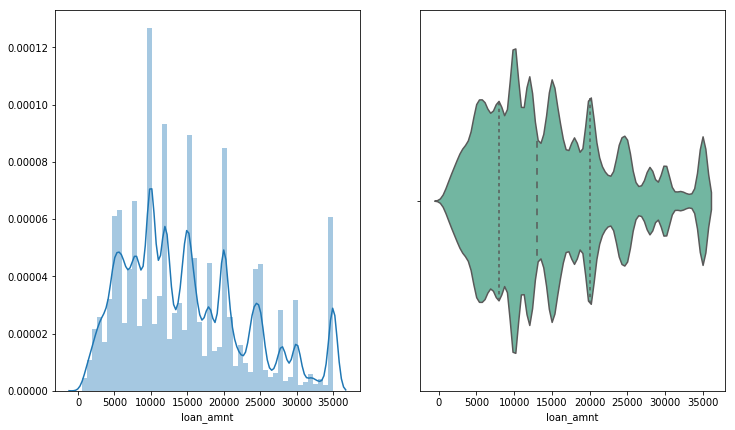

In [17]:
# start to check the load amount first 
fig,ax = plt.subplots(1,2, figsize = (12,7))
sns.distplot(df_loan.loan_amnt,ax = ax[0])
sns.violinplot(x= "loan_amnt",data = df_loan, ax = ax[1], inner = "quartile",palette = "Set2")
plt.show()

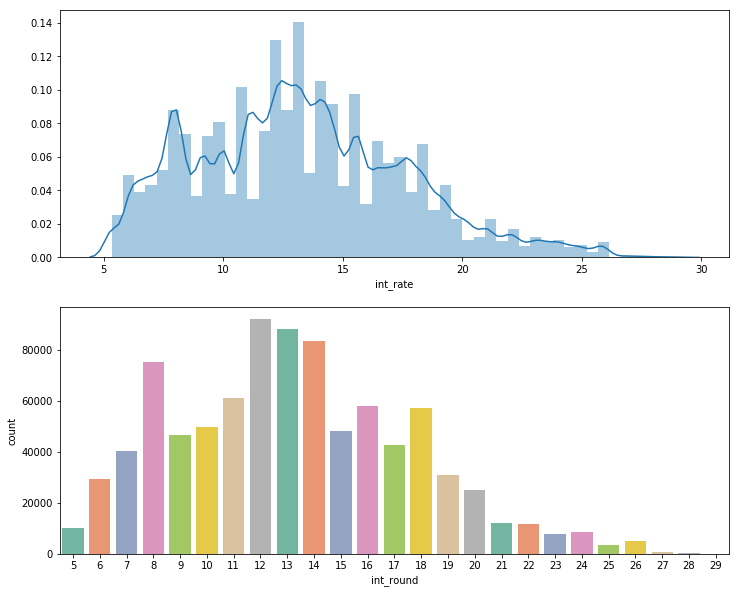

In [24]:
df_loan['int_round'] = df_loan.int_rate.round(0).astype(int)
fig, ax=plt.subplots(2,1,figsize=(12,10))
sns.distplot(df_loan["int_rate"],ax=ax[0])
sns.countplot(x = "int_round", data = df_loan,ax =ax[1],palette = 'Set2')

In [27]:
df_loan.loc[df_loan.loan_status == \
            'Does not meet the credit policy. Status:Fully Paid', 'loan_status'] = 'NMCP Fully Paid'
df_loan.loc[df_loan.loan_status == \
            'Does not meet the credit policy. Status:Charged Off', 'loan_status'] = 'NMCP Charged Off'


Current               601779
Fully Paid            207723
Charged Off            45248
Late (31-120 days)     11591
Issued                  8460
In Grace Period         6253
Late (16-30 days)       2357
NMCP Fully Paid         1988
Default                 1219
NMCP Charged Off         761
Name: loan_status, dtype: int64


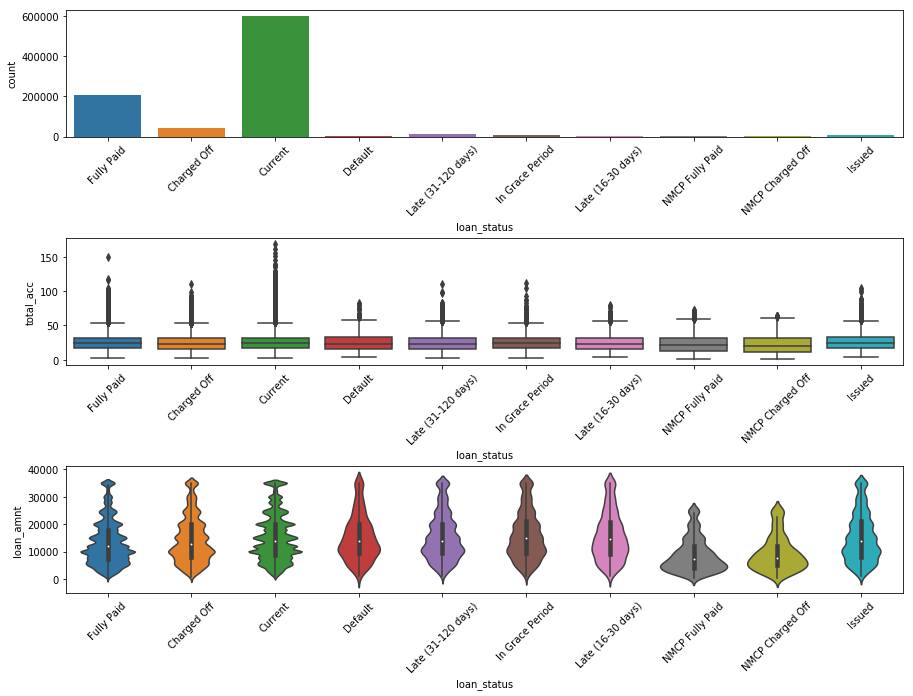

In [31]:
print(df_loan.loan_status.value_counts())
fig, ax =plt.subplots(3,1,figsize=(15,12))
plt.subplots_adjust(hspace = 0.8, top = 0.8)

g0 = sns.countplot(x="loan_status", data=df_loan,ax=ax[0])
g0.set_xticklabels(g0.get_xticklabels(),rotation=45)
g1 = sns.boxplot(x="loan_status", y="total_acc", data=df_loan,ax=ax[1])
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g2 = sns.violinplot(x="loan_status", y="loan_amnt", data=df_loan,ax=ax[2])
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.show()

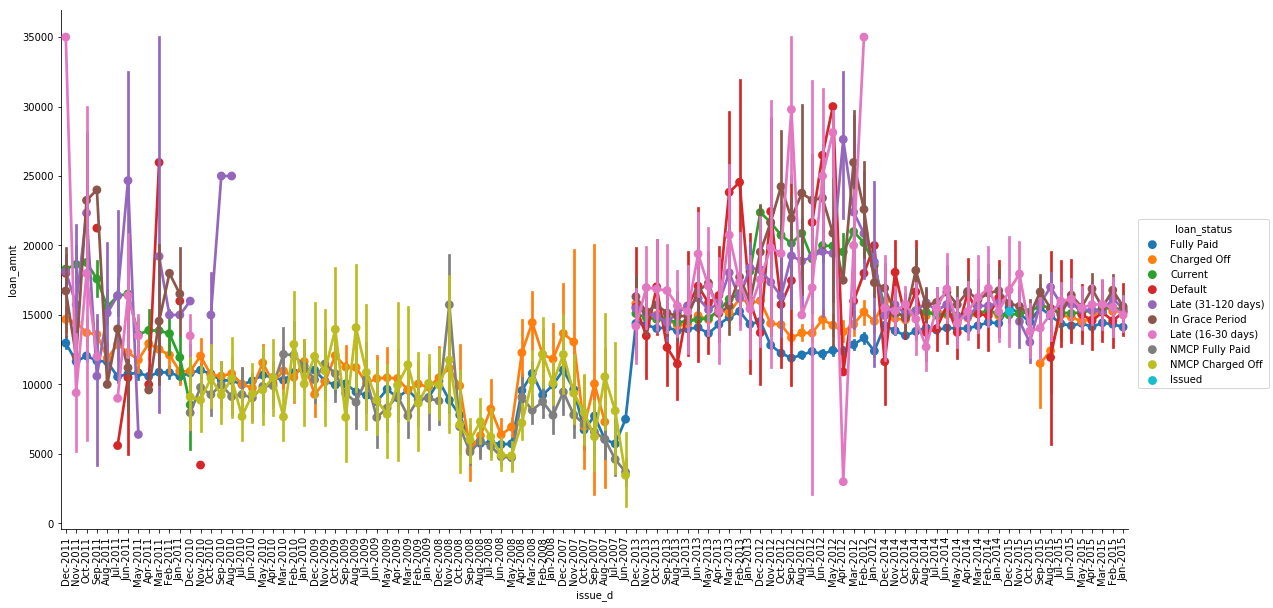

In [40]:
g = sns.factorplot(x='issue_d', y='loan_amnt', data=df_loan, 
                   hue='loan_status',
                   size=8,aspect=2)
g.set_xticklabels(rotation=90)
g.set_titles(template="Default by Issue_d")
plt.show()

In [39]:
# check for each loan status 
pt = sns.factorplot(x ='issue_d',data=df_loan[df_loan["loan_status"] == "default"],
                   hue ='loan_status',row ='loan_status',
                   kind ='count',size=6, aspect=2)
pt.set_xticklabels(rotation=90)
pt.set_titles("Counting Default by Time")
plt.show()
'''
g = sns.factorplot(x='issue_d', data=df_loan[df_loan["loan_status"] == "Default"], 
                   hue='loan_status', row='loan_status',
                   kind='count',size=6, aspect=2)
g.set_xticklabels(rotation=90)
g.set_titles("Counting Default by Time")
plt.show()
'''

ValueError: min() arg is an empty sequence